In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**************Note: ก่อน Display ภาพ Convert BGR to RGB ก่อน**********

In [30]:
def notched_rejected(shape,d0,u_k,v_k):
    M,N=shape
    H=np.zeros((M,N))

    for u in range(0,M):
        for v in range(0,N):

            D_uv=np.sqrt((u-M/2+u_k)**2+(v-N/2+v_k)**2)
            D_muv=np.sqrt((u-M/2-u_k)**2+(v-N/2-v_k)**2)

            if(D_uv< d0 or D_muv < d0):
                H[u,v]=0.0
            else:
                H[u,v]=1.0
    return H

In [32]:
ori_img=cv.imread("medicine_with_noise_mid.jpg")

f=np.fft.fft2(ori_img)
fshift=np.fft.fftshift(f)
magnitude_spt=20*np.log(abs(fshift))
##########################################
img_shape=ori_img.shape

H1=notched_rejected(img_shape,9,10,10)

notched_filer=H1
notched_rejected_center=fshift*notched_filer

###########################################
fig=plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(cv.cvtColor(ori_img,cv.COLOR_BGR2RGB),'gray')

plt.subplot(222)
plt.imshow(magnitude_spt,'gray')

plt.subplot(223)
plt.imshow(magnitude_spt*notched_filer,'gray')

ValueError: too many values to unpack (expected 2)

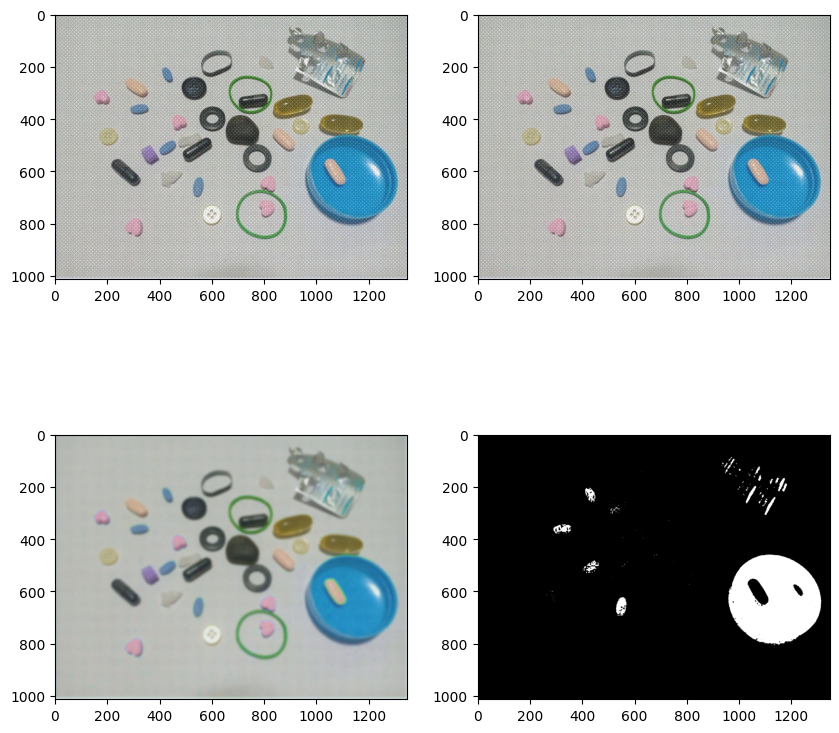

In [ ]:
# ori_img = cv.imread("medicine_with_noise_mid.jpg")
# # img = cv.cvtColor(ori_img, cv.COLOR_BGR2RGB)
# img_hsv=cv.cvtColor(ori_img, cv.COLOR_BGR2HSV)

# blur = cv.GaussianBlur(img_hsv,(25,25),0)

# upper=np.array([105,255,255])
# lower=np.array([90,50,50])

# mask=cv.inRange(img_hsv,lower,upper)
# mask_indices=np.where(mask==255)
# # mask=cv.cvtColor(mask, cv.COLOR_BGR2RGB)
# # bgr_img = cv.cvtColor(img_hsv,c
# # v.COLOR_RGB2BGR)

# fig=plt.figure(figsize=(10,10))

# plt.subplot(221)
# plt.imshow(cv.cvtColor(ori_img,cv.COLOR_BGR2RGB))

# plt.subplot(222)
# plt.imshow(cv.cvtColor(ori_img,cv.COLOR_BGR2RGB))

# plt.subplot(223)
# plt.imshow(cv.cvtColor(blur,cv.COLOR_HSV2RGB))

# plt.subplot(224)
# plt.imshow(cv.cvtColor(mask,cv.COLOR_BGR2RGB))